In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
from sklearn.metrics import mean_squared_error

jean_url = 'https://raw.githubusercontent.com/nahariaprateek/SuppyChain_Analytics/main/datasets_course/jeans_data.csv'
airline_url = 'https://raw.githubusercontent.com/nahariaprateek/SuppyChain_Analytics/main/datasets_course/airline_data.csv'


dfjeans = pd.read_csv(jean_url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part I
a. Moving Average (MA) estimations

• Try N = 1 to 5 and forecast estimates for weeks 6 to 26

• Start forecast on week 6 as need 5 weeks of historical data for N=5

• Report resultant MSE values

• MA* = [MA(N) with optimal value of N]

In [ ]:
dfjeans

,week,sales,price,special_event,se_indicator,promo_114,promo_101,residual
0,1,230,114.75,Presidents Day,1,True,False,16.75
1,2,71,135.00,NaN,0,False,False,12.10
2,3,70,135.00,NaN,0,False,False,11.10
3,4,65,135.00,NaN,0,False,False,6.10
4,5,60,135.00,NaN,0,False,False,1.10
5,6,195,114.75,Easter,1,True,False,-18.25
6,7,76,135.00,NaN,0,False,False,17.10
7,8,51,135.00,NaN,0,False,False,-7.90
8,9,79,135.00,NaN,0,False,False,20.10
9,10,146,114.75,NaN,0,True,False,1.50


In [ ]:
# Moving Average (MA) estimation
def moving_average(series, n):
    return np.average(series[-n:])

mse_ma = []
for N in range(1, 6):
    ma_forecast = [moving_average(dfjeans['residual'][:i], N) for i in range(5, len(dfjeans))]
    mse = mean_squared_error(dfjeans['residual'][5:], ma_forecast)
    mse_ma.append(mse)
    print(f'MSE for N = {N}: {mse}')

optimal_N = mse_ma.index(min(mse_ma)) + 1

print(f'MA*: Optimal N = {optimal_N}, MSE = {min(mse_ma)}')


MSE for N = 1: 300.99404761904685
MSE for N = 2: 147.49553571428547
MSE for N = 3: 165.6935978835975
MSE for N = 4: 149.70437499999974
MSE for N = 5: 167.24468095238075
MA*: Optimal N = 2, MSE = 147.49553571428547


In [ ]:
dfjeans

Single Exponential Smoothing (ES) estimations

• Try alpha = 0.1 to 1 using 0.1 increments and forecast estimates for weeks 6 to 26

• Assume a burn-in period of 5 weeks

• Report resultant MSE values• Single ES* = [Single ES(alpha) with optimal value of alpha]

In [ ]:
#Single Exponential Smoothing (ES)
alphas = np.arange(0.1, 1.1, 0.1)
mse_es = [mean_squared_error(residuals[5:], \
                              [residuals[:i+5].ewm(alpha=alpha, adjust=False).mean().iloc[-1] \
                               for i in range(len(residuals) - 5)]) \
          for alpha in alphas]
mse_es


[187.05921477302914,
 157.06279098668256,
 156.02964087886286,
 162.74275626154628,
 173.670690251533,
 188.36680721045846,
 207.28311422390647,
 231.33090158207,
 261.8839298952923,
 300.99404761904685]

In [ ]:
optimal_alpha = alphas[np.argmin(mse_es)]
#Single ES* forecast with optimal alpha
es_star_forecast = pd.Series(residuals[:5].tolist() + \
                              [residuals[:i+5].ewm(alpha=optimal_alpha, adjust=False).mean().iloc[-1] \
                               for i in range(len(residuals) - 5)], \
                              index=residuals.index)
print("Optimal alpha value:", optimal_alpha)
print(es_star_forecast)

Optimal alpha value: 0.30000000000000004
0     16.750000
1     12.100000
2     11.100000
3      6.100000
4      1.100000
5      8.509465
6      0.481626
7      5.467138
8      1.456996
9      7.049898
10     5.384928
11     6.799450
12     2.689615
13     2.212730
14    -1.121089
15    -4.759762
16    -7.201833
17    -7.411283
18    -7.857898
19    -9.370529
20    -2.134370
21    -5.064059
22    -3.514841
23    -3.630389
24    -2.991272
25    -5.363891
dtype: float64


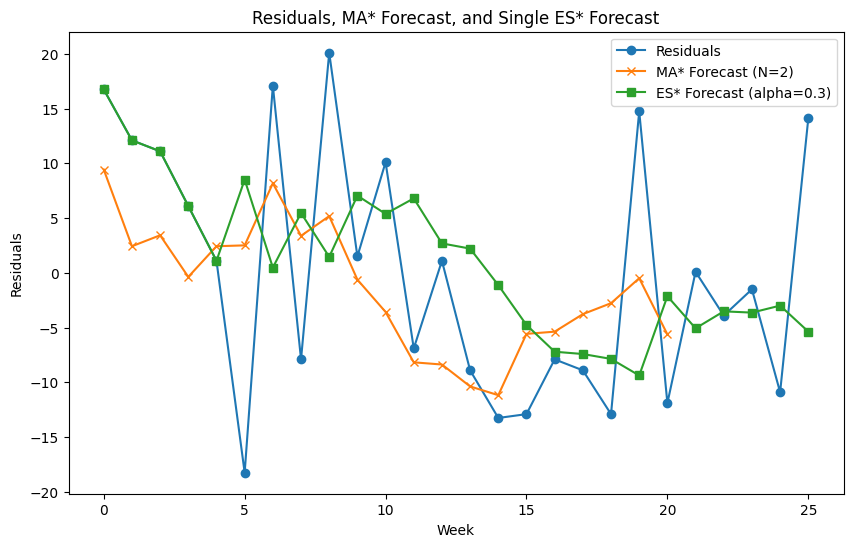

In [ ]:
#Plotting the 
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', marker='o')
plt.plot(ma_forecast, label=f'MA* Forecast (N={optimal_N})', marker='x')
plt.plot(es_star_forecast, label=f'ES* Forecast (alpha={optimal_alpha:.1f})', marker='s')
plt.xlabel('Week')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals, MA* Forecast, and Single ES* Forecast')
plt.show()


In [ ]:
residuals = olsjeans.resid

In [ ]:
dfjeans.head()

,week,sales,price,special_event,se_indicator
0,1,230,114.75,Presidents Day,1
1,2,71,135.00,NaN,0
2,3,70,135.00,NaN,0
3,4,65,135.00,NaN,0
4,5,60,135.00,NaN,0


In [ ]:
dfjeans["promo_114"] = dfjeans.price == 114.75
dfjeans["promo_101"] = dfjeans.price == 101.25

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(dfjeans[["promo_114","promo_101"]].astype("int"))
X["se_indicator"] = dfjeans.se_indicator

In [ ]:
olsjeans = sm.OLS(dfjeans.sales, X).fit()
print(olsjeans.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     231.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           8.69e-17
Time:                        15:03:36   Log-Likelihood:                -99.689
No. Observations:                  26   AIC:                             207.4
Df Residuals:                      22   BIC:                             212.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.9000      2.721     21.649   

In [ ]:
dfjeans["residual"] = olsjeans.resid

## PART II 

In [71]:
#path = /content/drive/MyDrive/Data/bitcoin_data.pkl
bitcoin_path = "/content/drive/MyDrive/Data/bitcoin_data.pkl"
dfbitcoin = pd.read_pickle(bitcoin_path)
from statsmodels.tsa.stattools import adfuller
dfbitcoin.tail(5)

,date,price
175,2018-08-11,6311.131667
176,2018-08-12,6347.070000
177,2018-08-13,6050.942500
178,2018-08-14,6362.676923
179,2018-08-15,6342.629231


In [72]:
dfbitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    180 non-null    object 
 1   price   180 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [74]:
dfbitcoin['date'] = pd.to_datetime(dfbitcoin['date']) #Since Dtype is object

In [78]:
#Augmented Dickey-Fuller test
adf_result = adfuller(dfbitcoin['price'])
adf_result

(-1.9180999466790931,
 0.3235948146052027,
 0,
 179,
 {'1%': -3.4674201432469816,
  '5%': -2.877826051844538,
  '10%': -2.575452082332012},
 2338.7943666900237)

**Augmented Dickey-Fuller test**

ADF Statistic: -1.9181
Number of observations used: 179
Number of lags used: 0
p-value: 0.3236

**Critical Values**: 1%: -3.4674, 5%: -2.8778, 10%: -2.5755

The p-value (0.3236) > 0.05, and the ADF statistic (-1.9181) > all_critical values
Therefore We cannot reject the null hypothesis. 

Hence the bitcoin dataset is non - stationary.

### 2.Double Exponential Smoothing (DES) estimations

In [148]:
from statsmodels.tsa.api import ExponentialSmoothing
from itertools import product
import time
import matplotlib.pyplot as plt

In [103]:
def DESMSE(alpha, beta):
    model = ExponentialSmoothing(dfbitcoin.price[:150],
                                 trend="add",
                                 initialization_method='estimated')
    fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta)
    predictions = fitted_model.predict(10, 149)
    mse = mean_squared_error(dfbitcoin.price[10:150], predictions)
    return mse


In [116]:
def expand_grid(params):
    return pd.DataFrame(list(product(*params.values())), columns=params.keys())

params = {
    'alpha': np.arange(0.0, 1.05, 0.05),
    'beta': np.arange(0.0, 1.05, 0.05)
}

expanded_grid = expand_grid(params)
print(expanded_grid)
print(params)

     alpha  beta
0      0.0  0.00
1      0.0  0.05
2      0.0  0.10
3      0.0  0.15
4      0.0  0.20
..     ...   ...
436    1.0  0.80
437    1.0  0.85
438    1.0  0.90
439    1.0  0.95
440    1.0  1.00

[441 rows x 2 columns]
{'alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'beta': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}


In [117]:
des_results = expand_grid(dictionary)
des_results

,alpha,beta
0,0.0,0.00
1,0.0,0.05
2,0.0,0.10
3,0.0,0.15
4,0.0,0.20
...,...,...
436,1.0,0.80
437,1.0,0.85
438,1.0,0.90
439,1.0,0.95


In [121]:
# Adding Column
des_results['mse'] = [0] * len(des_results)
des_results

,alpha,beta,mse
0,0.0,0.00,0
1,0.0,0.05,0
2,0.0,0.10,0
3,0.0,0.15,0
4,0.0,0.20,0
...,...,...,...
436,1.0,0.80,0
437,1.0,0.85,0
438,1.0,0.90,0
439,1.0,0.95,0


In [142]:
start = time.time()

def calculate_mse(row):
    alpha, beta = row['alpha'], row['beta']
    mse = DESMSE(alpha, beta)
    return mse
des_results['mse'] = des_results.apply(calculate_mse, axis=1)
end = time.time()
a = end - start
print('end - start',a)
des_results.sort_values("mse").head(10)

end - start 5.532822847366333


,alpha,beta,mse
399,0.95,0.00,96794.741146
420,1.00,0.00,96819.201621
378,0.90,0.00,97372.968309
357,0.85,0.00,98568.980988
400,0.95,0.05,99607.998050
421,1.00,0.05,99847.692561
379,0.90,0.05,100030.452243
336,0.80,0.00,100418.804995
358,0.85,0.05,101127.650450
401,0.95,0.10,101642.075247


In [146]:
optimal_alpha = 0.95
optimal_beta = 0.00

model = ExponentialSmoothing(dfbitcoin.price[:150],
                             trend="add",
                             initialization_method='estimated')\
                             .fit(smoothing_level=optimal_alpha, smoothing_trend=optimal_beta)

dfbitcoin.loc[dfbitcoin.index[150:], 'des'] = model.forecast(30)


In [147]:
actual_prices = dfbitcoin.price[150:]
des_forecast = dfbitcoin.des[150:]

mse = mean_squared_error(actual_prices, des_forecast)
mse


917015.9984515626

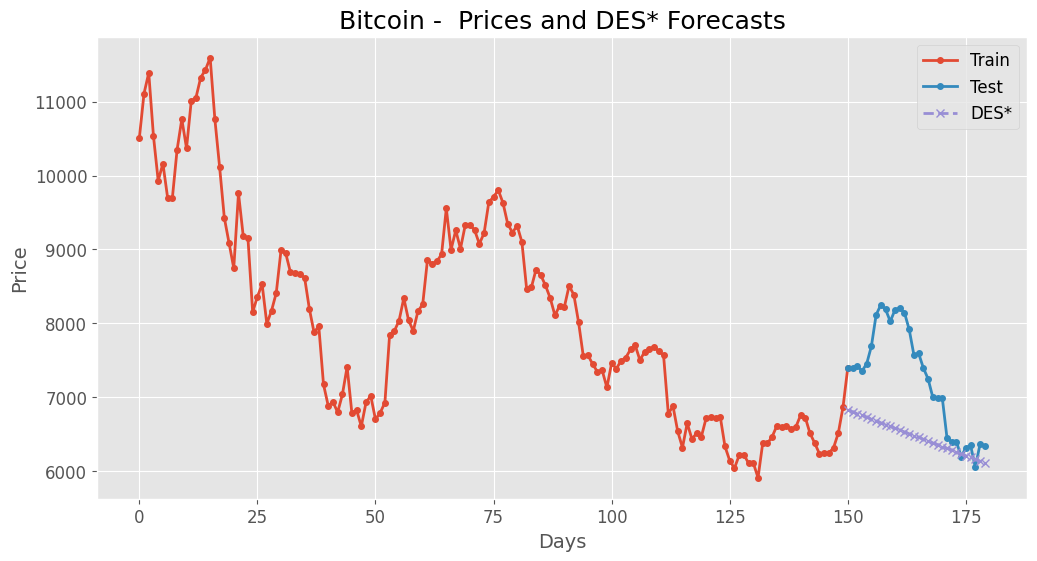

In [151]:
#PLOT
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

plt.plot(dfbitcoin.price[:151], label='Train', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(dfbitcoin.price[150:], label='Test', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(dfbitcoin.des[150:], label='DES*', marker='x', linestyle='--', linewidth=2, markersize=6)

plt.legend(loc='best', fontsize='large')
plt.title('Bitcoin -  Prices and DES* Forecasts', fontsize=18)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


## Part III: De-Seasonalizing Data and Forecasting

In [158]:
airline_ds = pd.read_csv(airline_url)
airline_ds

,Unnamed: 0,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,January,64.40,65.28,69.77,72.68,72.30,72.95,72.82,74.89,76.55,78.02,78.89
1,February,68.10,68.60,71.58,76.07,75.71,75.91,75.28,77.35,77.92,78.90,80.77
2,March,72.43,75.13,79.58,81.31,81.57,82.19,81.08,83.39,82.70,84.43,84.99
3,April,72.13,76.17,76.64,81.34,81.38,80.09,82.10,82.55,82.13,83.61,82.81
4,May,73.98,74.41,77.52,80.39,81.27,81.34,81.32,82.51,84.58,84.45,84.84
5,June,78.58,80.72,82.27,84.56,86.24,84.24,85.37,86.32,85.98,86.62,86.98
6,July,80.98,82.20,83.94,84.95,86.24,84.11,87.09,86.90,87.14,86.83,86.46
7,August,78.74,78.74,80.34,80.90,84.89,83.35,84.97,85.20,85.59,86.61,85.53
8,September,66.93,70.39,74.12,73.78,75.61,76.07,79.42,79.81,81.82,80.64,80.90
9,October,71.47,74.23,75.94,77.50,78.45,79.76,82.22,83.32,83.63,84.23,82.77


In [159]:
airline_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12 non-null     object 
 1   2003        12 non-null     float64
 2   2004        12 non-null     float64
 3   2005        12 non-null     float64
 4   2006        12 non-null     float64
 5   2007        12 non-null     float64
 6   2008        12 non-null     float64
 7   2009        12 non-null     float64
 8   2010        12 non-null     float64
 9   2011        12 non-null     float64
 10  2012        12 non-null     float64
 11  2013        10 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.2+ KB


In [169]:
#deseasoning
airline_ds = airline_ds.reset_index()
airline_ds = pd.melt(airline_ds, id_vars=['index'])
airline_ds = airline_ds.iloc[12: , :]
airline_ds.columns = ["month","year","load"]
airline_ds

,month,year,load
12,24,month,60
13,25,month,61
14,26,month,62
15,27,month,63
16,28,month,64
...,...,...,...
10219,3415,load,85.53
10220,3416,load,80.9
10221,3417,load,82.77
10222,3418,load,NaN


In [170]:
# Convert the 'load' column to a numeric type
airline_ds['load'] = pd.to_numeric(airline_ds['load'], errors='coerce')

# Now run the alternate code provided earlier
avg_load = airline_ds['load'].dropna().mean()
month_avg = airline_ds.groupby('month')['load'].mean().reset_index()
month_avg.columns = ['month', 'month_avg']
airline_ds = airline_ds.merge(month_avg, on='month')
airline_ds['season_factor'] = airline_ds['month_avg'] / avg_load
airline_ds['de_load'] = airline_ds['load'] / airline_ds['season_factor']

airline_ds.head(24)


,month,year,load,month_avg,season_factor,de_load
0,24,month,60.0,48.0,0.196574,305.228261
1,24,year,NaN,48.0,0.196574,NaN
2,24,load,36.0,48.0,0.196574,183.136957
3,25,month,61.0,49.0,0.200669,303.982432
4,25,year,NaN,49.0,0.200669,NaN
5,25,load,37.0,49.0,0.200669,184.382786
6,26,month,62.0,50.0,0.204765,302.786435
7,26,year,NaN,50.0,0.204765,NaN
8,26,load,38.0,50.0,0.204765,185.578783
9,27,month,63.0,51.0,0.208860,301.637340


In [175]:
ad_result_airline = adfuller(airline_ds.de_load[:130].dropna())
ad_result_airline = adfuller(airline_ds.de_load[:130].fillna(airline_ds.de_load.mean()))

ad_result_airline = adfuller(airline_ds.de_load[:130])
ad_result_airline

MissingDataError: ignored